In [ ]:
import os
import json
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from zipfile import ZipFile
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image

In [ ]:
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
!pip install kaggle

In [ ]:
kaggle_cred = json.load(open("/content/kaggle.json"))

In [ ]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_cred["username"]
os.environ['KAGGLE_KEY'] = kaggle_cred["key"]

In [ ]:
!kaggle datasets download -d nirmalsankalana/plant-diseases-training-dataset

Dataset URL: https://www.kaggle.com/datasets/nirmalsankalana/plant-diseases-training-dataset
License(s): CC0-1.0
plant-diseases-training-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

aaaa.JPG  data	kaggle.json  plant-diseases-training-dataset.zip  sample_data


In [ ]:
with ZipFile("plant-diseases-training-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
print(os.listdir("data"))

print(len(os.listdir("/content/data")))
print(os.listdir("/content/data")[:5])

['Raspberry___healthy', 'Tomato___bacterial_spot', 'Potato___late_blight', 'Potato___bacterial_wilt', 'Grape___black_measles', 'Apple___brown_spot', 'Potato___healthy', 'Sugercane___mosaic', 'Tomato___late_blight', 'Grape___leaf_blight', 'Apple___rust', 'Potato___phytophthora', 'Peach___bacterial_spot', 'Rice___bacterial_blight', 'Tomato___septoria_leaf_spot', 'Blueberry___healthy', 'Cassava___green_mottle', 'Rice___brown_spot', 'Tomato___leaf_mold', 'Apple___alternaria_leaf_spot', 'Sugercane___red_rot', 'Cassava___healthy', 'Apple___black_rot', 'Tomato___spider_mites', 'Sugercane___yellow_leaf', 'Corn___gray_leaf_spot', 'Corn___common_rust', 'Cherry___powdery_mildew', 'Tomato___target_spot', 'Potato___nematode', 'Apple___gray_spot', 'Potato___early_blight', 'Soybean___healthy', 'Tomato___leaf_curl', 'Corn___healthy', 'Tomato___mosaic_virus', 'Strawberry___leaf_scorch', 'Orange___citrus_greening', 'Rice___tungro', 'Apple___healthy', 'Grape___black_rot', 'Tomato___early_blight', 'Potato

In [ ]:
# Dataset Path
dataset = '/content/data'

(256, 256, 3)


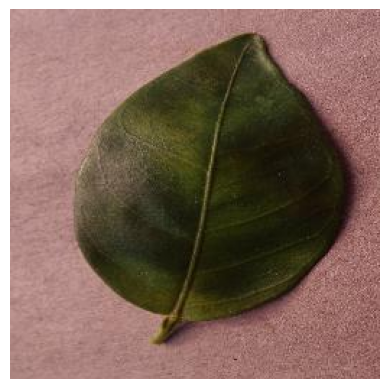

In [ ]:
image_path = '/content/data/Orange___citrus_greening/0a3fca55-16e9-4ba6-8c3f-cec4f67e246c___CREC_HLB 7935.JPG'
# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
image_path = '/content/data/Apple___rust/004131.JPG'
# Read the image
img = mpimg.imread(image_path)

print(img)

[[[0.40392157 0.47843137 0.2627451 ]
  [0.32941177 0.42745098 0.20392157]
  [0.34509805 0.4392157  0.21568628]
  ...
  [0.45490196 0.5058824  0.47843137]
  [0.39607844 0.44705883 0.41960785]
  [0.39607844 0.46666667 0.43529412]]

 [[0.4117647  0.4862745  0.27058825]
  [0.36078432 0.45882353 0.23529412]
  [0.34901962 0.44313726 0.22352941]
  ...
  [0.45882353 0.50980395 0.48235294]
  [0.43137255 0.48235294 0.45490196]
  [0.34117648 0.40784314 0.3764706 ]]

 [[0.41568628 0.49803922 0.2784314 ]
  [0.3647059  0.4627451  0.23921569]
  [0.3647059  0.46666667 0.24313726]
  ...
  [0.44705883 0.5058824  0.47843137]
  [0.42352942 0.48235294 0.45490196]
  [0.29803923 0.38431373 0.3372549 ]]

 ...

 [[0.27058825 0.24705882 0.10588235]
  [0.23529412 0.21960784 0.10588235]
  [0.16470589 0.17254902 0.08235294]
  ...
  [0.39607844 0.40784314 0.46666667]
  [0.37254903 0.38431373 0.44313726]
  [0.38039216 0.3882353  0.44313726]]

 [[0.2784314  0.25882354 0.12941177]
  [0.21568628 0.21176471 0.09019608]


In [ ]:
# Image Parameters
img_size = 64
batch_size = 64

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    dataset,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'    # Set as training data
)

Found 76395 images belonging to 60 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    dataset,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'    # Set as validation data
)

Found 19073 images belonging to 60 classes.


In [ ]:
# Simple and Fast Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 60)                  │           3,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 650,108 (2.48 MB)

 Trainable params: 650,108 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the Model
from tensorflow.keras.optimizers import Adam
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,  # Reduced number of epochs
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1193/1193 ━━━━━━━━━━━━━━━━━━━━ 835s 697ms/step - accuracy: 0.3781 - loss: 2.4736 - val_accuracy: 0.5894 - val_loss: 1.5365
Epoch 2/10
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 1s 72us/step - accuracy: 0.6250 - loss: 0.9819 - val_accuracy: 0.0000e+00 - val_loss: 2.6406
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1193/1193 ━━━━━━━━━━━━━━━━━━━━ 845s 683ms/step - accuracy: 0.6742 - loss: 1.0619 - val_accuracy: 0.6749 - val_loss: 1.1762
Epoch 4/10
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 45s 38ms/step - accuracy: 0.6875 - loss: 0.8162 - val_accuracy: 1.0000 - val_loss: 1.5334
Epoch 5/10
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 858s 667ms/step - accuracy: 0.7401 - loss: 0.8137 - val_accuracy: 0.7291 - val_loss: 1.0195
Epoch 6/10
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 0s 34us/step - accuracy: 0.7812 - loss: 0.7426 - val_accuracy: 0.0000e+00 - val_loss: 1.6041
Epoch 7/10
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 785s 656ms/step - accuracy: 0.7768 - loss: 0.6867 - val_accuracy: 0.7326 - val_loss: 1.0473
Epoch 8/10
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 0s 108us/step - accuracy: 0.8281 - loss: 0.4270 - val_accuracy: 1.0000 - val_loss: 0.0810
Epoch 9/10
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 777s 651ms/step - accuracy: 0.7969 - loss: 0.6128 - val_accuracy: 0.7554 - val_loss: 0.9502
Epoch 10/10
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8125 - 

In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
298/298 ━━━━━━━━━━━━━━━━━━━━ 85s 285ms/step - accuracy: 0.7576 - loss: 0.9348
Validation Accuracy: 75.62%


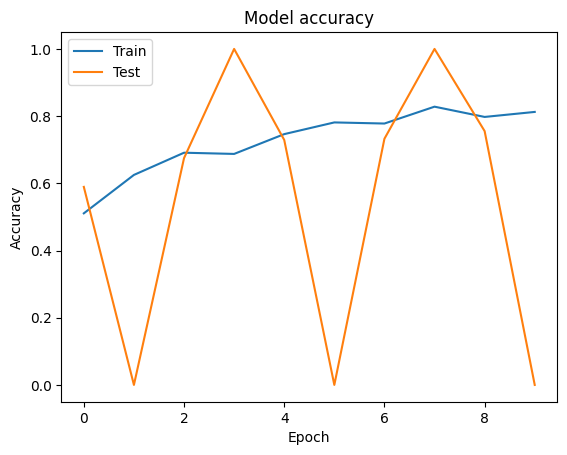

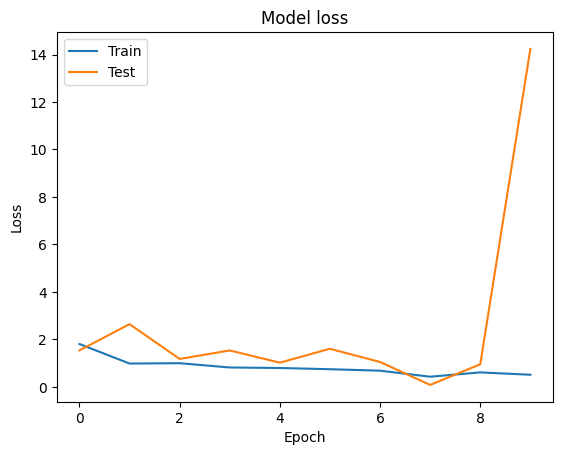

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name


In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}
class_indices

{0: 'Apple___alternaria_leaf_spot',
 1: 'Apple___black_rot',
 2: 'Apple___brown_spot',
 3: 'Apple___gray_spot',
 4: 'Apple___healthy',
 5: 'Apple___rust',
 6: 'Apple___scab',
 7: 'Bell_pepper___bacterial_spot',
 8: 'Bell_pepper___healthy',
 9: 'Blueberry___healthy',
 10: 'Cassava___bacterial_blight',
 11: 'Cassava___brown_streak_disease',
 12: 'Cassava___green_mottle',
 13: 'Cassava___healthy',
 14: 'Cassava___mosaic_disease',
 15: 'Cherry___healthy',
 16: 'Cherry___powdery_mildew',
 17: 'Corn___common_rust',
 18: 'Corn___gray_leaf_spot',
 19: 'Corn___healthy',
 20: 'Corn___northern_leaf_blight',
 21: 'Grape___black_measles',
 22: 'Grape___black_rot',
 23: 'Grape___healthy',
 24: 'Grape___leaf_blight',
 25: 'Orange___citrus_greening',
 26: 'Peach___bacterial_spot',
 27: 'Peach___healthy',
 28: 'Potato___bacterial_wilt',
 29: 'Potato___early_blight',
 30: 'Potato___healthy',
 31: 'Potato___late_blight',
 32: 'Potato___nematode',
 33: 'Potato___pests',
 34: 'Potato___phytophthora',
 35: 

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
def predict_image_class(model, image_path, class_indices):
    # Get the input shape from the model
    input_shape = model.input_shape[1:3]  # (height, width)

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=input_shape)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Get the class name
    class_name = [k for k, v in class_indices.items() if v == predicted_class_index][0]

    return class_name

# Use the function
image_path = '/content/image.JPG'  # Replace with your image path
predicted_class_name = predict_image_class(model, image_path, train_generator.class_indices)

print(f"Predicted class: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
Predicted class: Apple___healthy


In [ ]:
model.save('plant_disease_prediction_model.h5')